

##Submitter: Doniyor Yuldashev


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Exploratory data analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
print(df.shape)

(10000, 14)


In [ ]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [ ]:
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


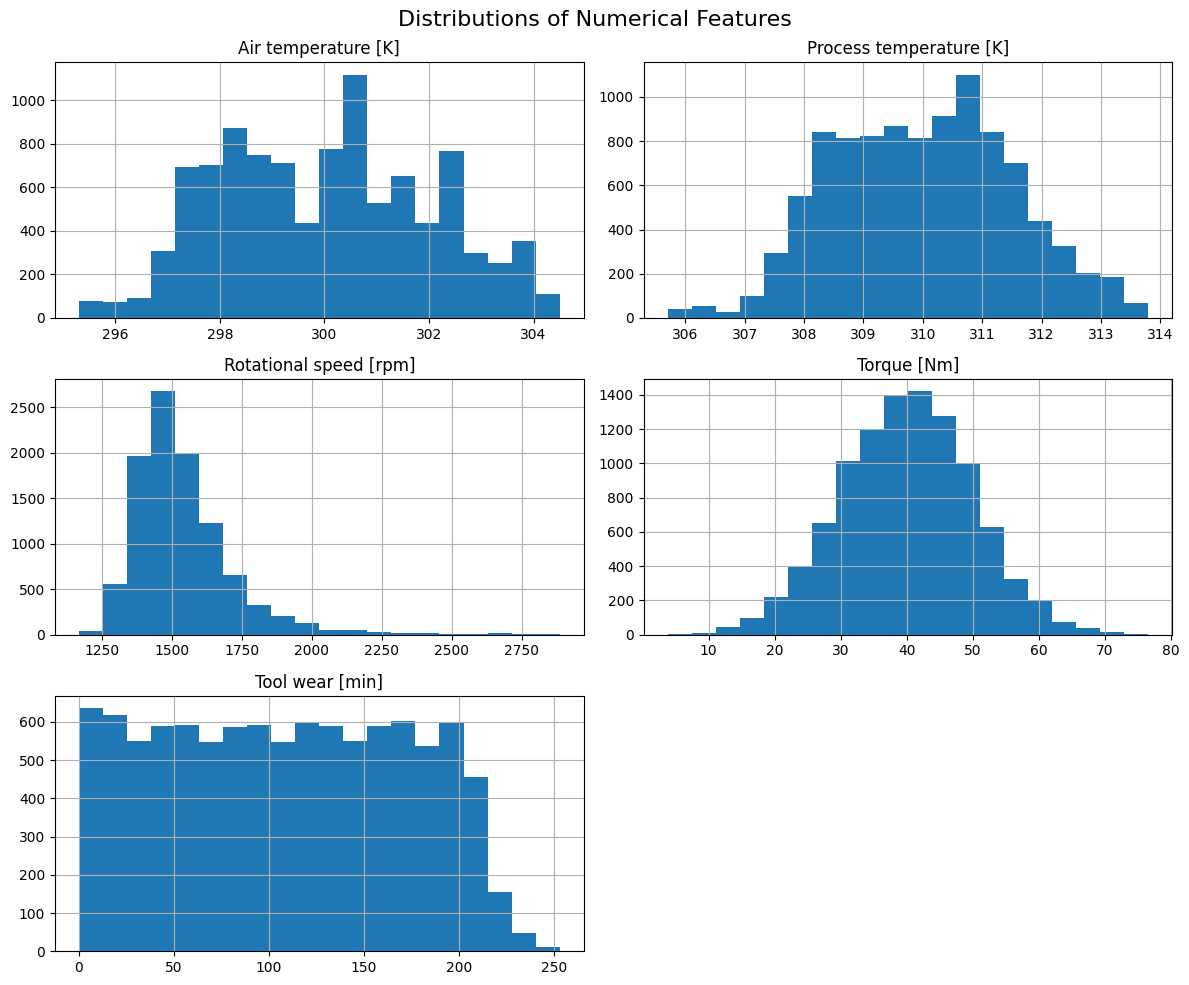

In [ ]:
numerical_columns = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

df[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

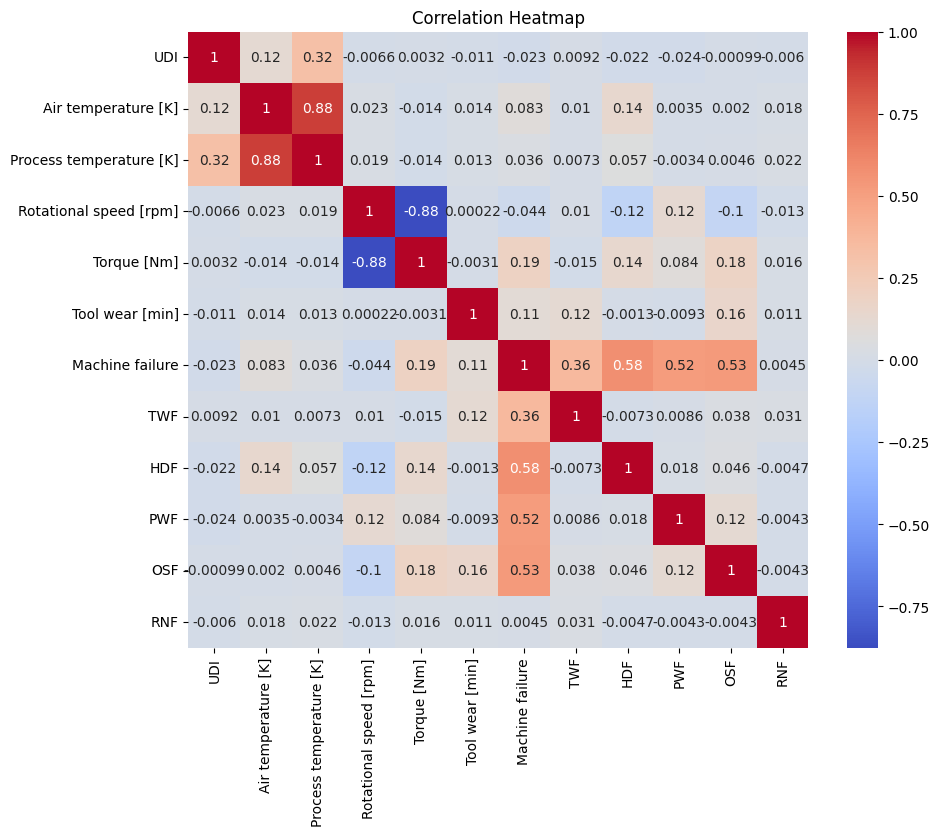

In [ ]:
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
target_column = 'Machine failure'

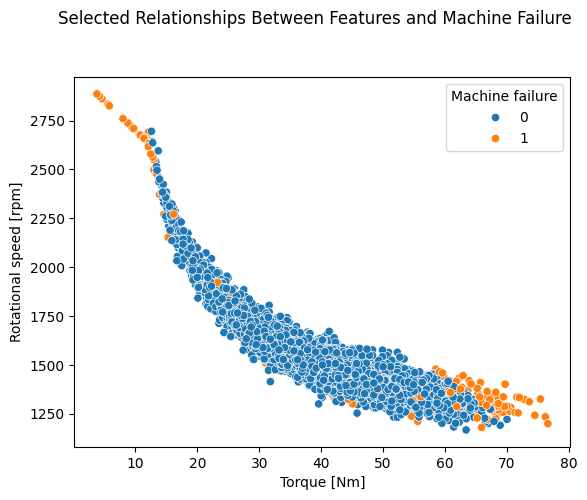

In [ ]:
sns.scatterplot(data=df, x='Torque [Nm]', y='Rotational speed [rpm]', hue='Machine failure')

plt.suptitle("Selected Relationships Between Features and Machine Failure", y=1.02)
plt.show()

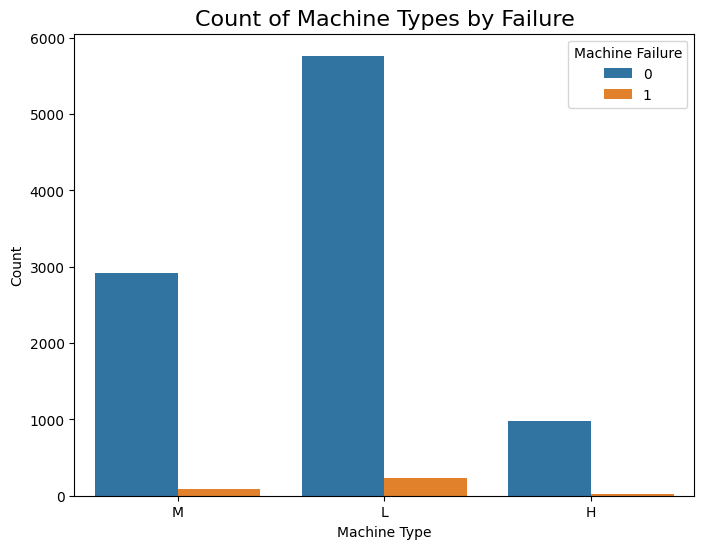

In [ ]:
if 'Type' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Type', data=df, hue=target_column)
    plt.title("Count of Machine Types by Failure", fontsize=16)
    plt.xlabel("Machine Type")
    plt.ylabel("Count")
    plt.legend(title="Machine Failure")
    plt.show()

In [ ]:
df['Machine failure'].groupby(df['Type']).value_counts()

Type  Machine failure
H     0                   982
      1                    21
L     0                  5765
      1                   235
M     0                  2914
      1                    83
Name: count, dtype: int64

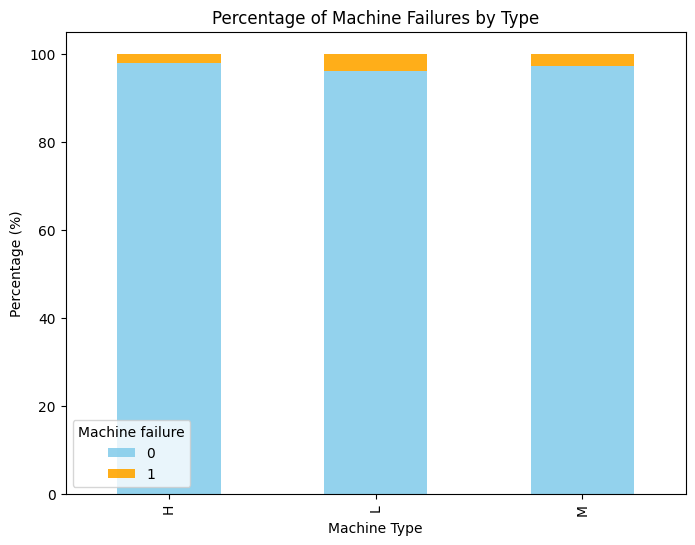

In [ ]:
failure_counts = df['Machine failure'].groupby(df['Type']).value_counts().unstack(fill_value=0)

failure_percentages = failure_counts.div(failure_counts.sum(axis=1), axis=0) * 100

failure_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'], alpha=0.9)
plt.title("Percentage of Machine Failures by Type")
plt.ylabel("Percentage (%)")
plt.xlabel("Machine Type")
plt.show()

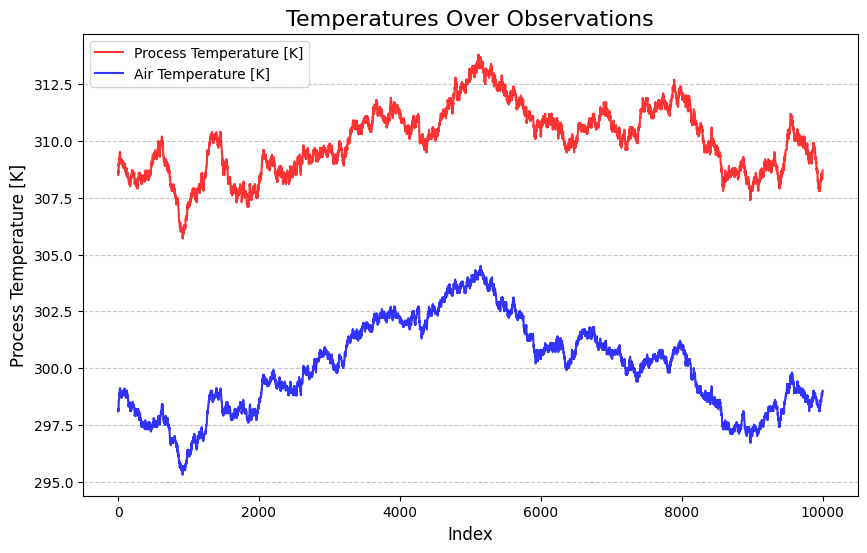

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Process temperature [K]'], label='Process Temperature [K]', color='red', alpha=0.8)
plt.plot(df.index, df['Air temperature [K]'], label='Air Temperature [K]', color='blue', alpha=0.8)
plt.title("Temperatures Over Observations", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Process Temperature [K]", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

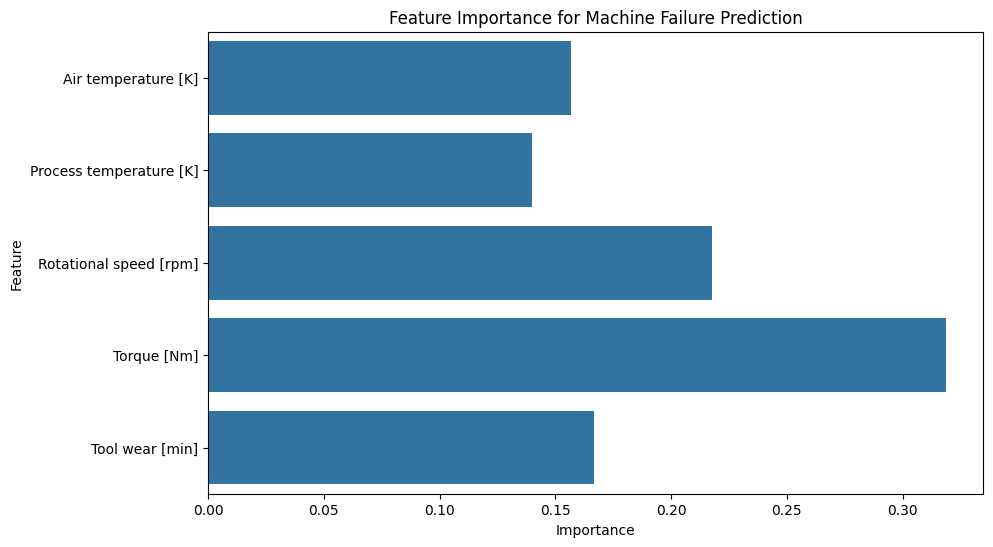

In [ ]:
from sklearn.ensemble import RandomForestClassifier

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
rf = RandomForestClassifier()
rf.fit(df[features], df['Machine failure'])

plt.figure(figsize=(10, 6))
sns.barplot(x=rf.feature_importances_, y=features)
plt.title('Feature Importance for Machine Failure Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


<ipython-input-49-0e96484413e5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_risk = df.groupby('Tool_wear_risk')['Machine failure'].mean()


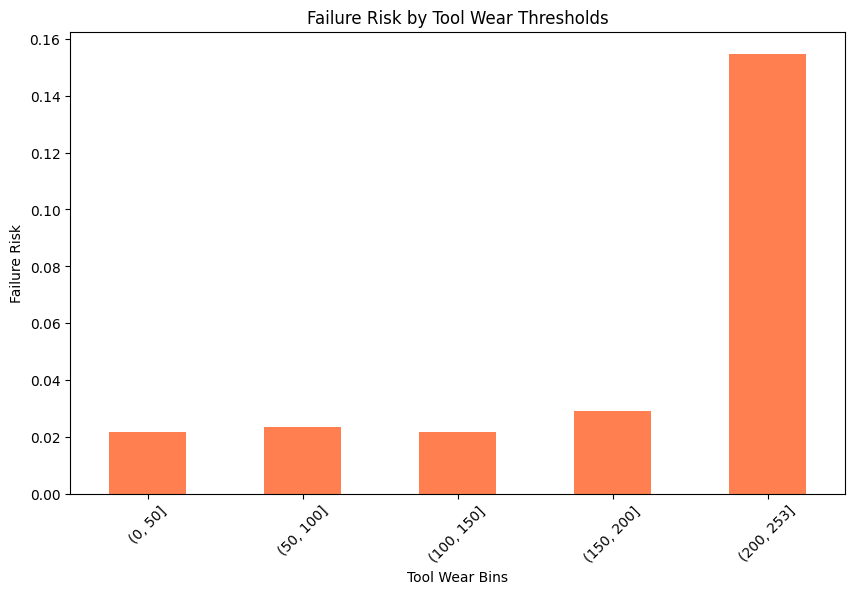

In [ ]:
df['Tool_wear_risk'] = pd.cut(df['Tool wear [min]'], bins=[0, 50, 100, 150, 200, df['Tool wear [min]'].max()])
failure_risk = df.groupby('Tool_wear_risk')['Machine failure'].mean()

plt.figure(figsize=(10, 6))
failure_risk.plot(kind='bar', color='coral')
plt.title("Failure Risk by Tool Wear Thresholds")
plt.xlabel("Tool Wear Bins")
plt.ylabel("Failure Risk")
plt.xticks(rotation=45)
plt.show()

#Preprocessing

Encode Categorical Variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
categorical_features = ['Product ID']

encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['Type']])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Type']))
df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=categorical_features, inplace=True)

Correlation

In [ ]:
encoded_df

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [ ]:
df=df.iloc[:, 2:]
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.0,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.0,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.0,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.0,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0.0,0.0,1.0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1.0,0.0,0.0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0.0,0.0,1.0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1.0,0.0,0.0


###Feature Scaling

In [ ]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0,0.0,0.0,1.0
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0,0.0,1.0,0.0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0,0.0,1.0,0.0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0,0.0,1.0,0.0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,0,0,0,0,0.0,0.0,1.0
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0,0,0,0,1.0,0.0,0.0
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,0,0,0,0,0.0,0.0,1.0
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0,0,0,0,1.0,0.0,0.0


###Handle Imbalanced Data

#Over Sampling Classification

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']

smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:\n", y_oversampled.value_counts())

Class distribution after SMOTE:
 Machine failure
0    9661
1    9661
Name: count, dtype: int64


###Split Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (15457, 8)
Testing data shape: (3865, 8)


###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1934
           1       0.97      0.98      0.98      1931

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

Accuracy: 0.9751617076326002


###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1934
           1       0.98      0.99      0.98      1931

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

Accuracy: 0.9816300129366106


###Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

SVM Results:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1934
           1       0.83      0.83      0.83      1931

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865

Accuracy: 0.8289780077619664


###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1934
           1       0.79      0.85      0.82      1931

    accuracy                           0.81      3865
   macro avg       0.81      0.81      0.81      3865
weighted avg       0.81      0.81      0.81      3865

Accuracy: 0.8108667529107374


#Under Sampling Classification

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']

random_sample = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = random_sample.fit_resample(X, y)

print("Class distribution after RandomUnderSampler:\n", y_undersampled.value_counts())

Class distribution after RandomUnderSampler:
 Machine failure
0    339
1    339
Name: count, dtype: int64


###Split Data into Training and Testing Sets

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

print("Training data shape:", X_train2.shape)
print("Testing data shape:", X_test2.shape)

Training data shape: (542, 8)
Testing data shape: (136, 8)


###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train2, y_train2)

y_pred = tree_model.predict(X_test2)
print("Decision Tree Results:")
print(classification_report(y_test2, y_pred))
print("Accuracy:", accuracy_score(y_test2, y_pred))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        76
           1       0.85      0.93      0.89        60

    accuracy                           0.90       136
   macro avg       0.90      0.90      0.90       136
weighted avg       0.90      0.90      0.90       136

Accuracy: 0.8970588235294118


###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train2, y_train2)

y_pred = rf_model.predict(X_test2)
print("Random Forest Results:")
print(classification_report(y_test2, y_pred))
print("Accuracy:", accuracy_score(y_test2, y_pred))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.89      0.93      0.91        60

    accuracy                           0.92       136
   macro avg       0.92      0.92      0.92       136
weighted avg       0.92      0.92      0.92       136

Accuracy: 0.9191176470588235


###Support Vector Machine (SVM)




In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train2, y_train2)

y_pred = svm_model.predict(X_test2)
print("SVM Results:")
print(classification_report(y_test2, y_pred))
print("Accuracy:", accuracy_score(y_test2, y_pred))

SVM Results:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        76
           1       0.75      0.80      0.77        60

    accuracy                           0.79       136
   macro avg       0.79      0.79      0.79       136
weighted avg       0.80      0.79      0.79       136

Accuracy: 0.7941176470588235


###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train2, y_train2)

y_pred = nb_model.predict(X_test2)
print("Naive Bayes Results:")
print(classification_report(y_test2, y_pred))
print("Accuracy:", accuracy_score(y_test2, y_pred))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        76
           1       0.84      0.82      0.83        60

    accuracy                           0.85       136
   macro avg       0.85      0.85      0.85       136
weighted avg       0.85      0.85      0.85       136

Accuracy: 0.8529411764705882


#Regression

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Results:
Mean Squared Error: 0.12901114805817326
R² Score: 0.483955096859945


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)
print("Decision Tree Regressor Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Decision Tree Regressor Results:
Mean Squared Error: 0.02483829236739974
R² Score: 0.9006467706719463


##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
print("Random Forest Regressor Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Random Forest Regressor Results:
Mean Squared Error: 0.013246985769728332
R² Score: 0.9470120249968269


##Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
print("Support Vector Regressor Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Support Vector Regressor Results:
Mean Squared Error: 0.1323091465331852
R² Score: 0.4707630950119638


##Random Forest Classifier - Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest Classifier:", grid_search_rf.best_params_)
print("Best Accuracy from Grid Search:", grid_search_rf.best_score_)

best_rf_classifier = grid_search_rf.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters for Random Forest Classifier: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy from Grid Search: 0.9794913333164583
Test Set Accuracy: 0.9824062095730919
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1934
           1       0.98      0.99      0.98      1931

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



##Random Forest Regressor - Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest Classifier:", grid_search_rf.best_params_)
print("Best Accuracy from Grid Search:", grid_search_rf.best_score_)

best_rf_classifier = grid_search_rf.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters for Random Forest Classifier: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy from Grid Search: 0.9777446021313038
Test Set Accuracy: 0.983699870633894
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1934
           1       0.98      0.99      0.98      1931

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



##Boosting Random Forest Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
print("XGBoost Classifier Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.99      0.99      0.99      1931

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865

Accuracy: 0.9899094437257439


##Boosting Random Forest Regressor

In [ ]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)

xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)
print("XGBoost Regressor Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

XGBoost Regressor Results:
R² Score: 0.9086586833000183
Mean Squared Error: 0.022835319861769676


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train = [
    [295.0, 305.5, 1200.0, 10.0, 50.0],
    [300.0, 310.0, 1500.0, 40.0, 100.0],
    [302.0, 311.0, 1400.0, 50.0, 150.0],
    [299.0, 308.0, 1450.0, 30.0, 80.0],
    [301.0, 312.0, 1600.0, 45.0, 200.0],
]
y_train = [0, 1, 0, 1, 0]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_scaled, y_train)

test_data = {
    "Air temperature [K]": [295.3, 298.3, 300.1, 301.5, 304.5],
    "Process temperature [K]": [305.7, 308.8, 310.1, 311.1, 313.8],
    "Rotational speed [rpm]": [1168.0, 1423.0, 1503.0, 1612.0, 2886.0],
    "Torque [Nm]": [3.8, 33.2, 40.1, 46.8, 76.6],
    "Tool wear [min]": [0.0, 53.0, 108.0, 162.0, 253.0],
}

test_df = pd.DataFrame(test_data)

test_df_scaled = scaler.transform(test_df)

classification_predictions = rf_classifier.predict(test_df_scaled)

print("Classification Results:")
for i, pred in enumerate(classification_predictions):
    print(f"Input {i+1}: => Machine Failure status: {pred}")

Classification Results:
Input 1: => Machine Failure status: 0
Input 2: => Machine Failure status: 1
Input 3: => Machine Failure status: 1
Input 4: => Machine Failure status: 0
Input 5: => Machine Failure status: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
